In [76]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from string import ascii_lowercase
import collections

In [77]:
df = pd.read_csv('sub_new_data1.csv')

In [78]:
df.head()

user_name  daily_profit  \
0         00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales     82.057523   
1  009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales     18.768728   
2    009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales     19.840337   
3  009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income     55.199238   
4  009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...      3.429364   

   daily_income      expenses      coeff   p_value Labels  
0    6220.60697   6138.549447  -0.731327  0.851442      M  
1   16376.42800  16357.659272 -19.845017  0.047304      G  
2   17489.60720  17469.766863 -24.935850  0.084332      G  
3    4383.18000   4327.980762   3.283642  0.338881      G  
4    3198.61200   3195.182636  -3.546503  0.172920      G

In [79]:
df.shape

(3148, 7)

In [80]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [81]:
df = df.drop(["expenses"], axis=1)

In [82]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [83]:
df = df.drop(["user_name", "p_value"], axis =1)

In [84]:
df.head()

daily_profit  daily_income      coeff Labels
0     82.057523    6220.60697  -0.731327      M
1     18.768728   16376.42800 -19.845017      G
2     19.840337   17489.60720 -24.935850      G
3     55.199238    4383.18000   3.283642      G
4      3.429364    3198.61200  -3.546503      G

In [85]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

In [86]:
labels = df['Labels'].unique().tolist()

In [87]:
alphab = []
daily_profit = []
daily_revenue = []
coeff = []
for label in labels:
    alphab.append(label)
    daily_profit.append(df.loc[(df['Labels'] == label)].mean()[0])
    daily_revenue.append(df.loc[(df['Labels'] == label)].mean()[1])
    coeff.append(df.loc[(df['Labels'] == label)].mean()[2])
    print("The label is", label)
    print(df.loc[(df['Labels'] == label)].mean())

The label is M
daily_profit      164.424153
daily_income    26410.587819
coeff             -63.040522
dtype: float64
The label is G
daily_profit      146.941637
daily_income    22480.887583
coeff             -77.889973
dtype: float64
The label is Q
daily_profit      150.978158
daily_income    17719.031260
coeff             -28.663210
dtype: float64
The label is I
daily_profit      110.164846
daily_income    26976.983416
coeff             -15.123609
dtype: float64
The label is A
daily_profit      153.645014
daily_income    33510.198488
coeff            -104.248974
dtype: float64
The label is H
daily_profit       70.343574
daily_income    13763.508271
coeff             -90.607428
dtype: float64
The label is L
daily_profit      141.820471
daily_income    28831.205296
coeff             -73.538772
dtype: float64
The label is C
daily_profit       -0.529215
daily_income    20454.581328
coeff             -47.015132
dtype: float64
The label is R
daily_profit      231.815850
daily_income    2757

<IPython.core.display.Javascript object>


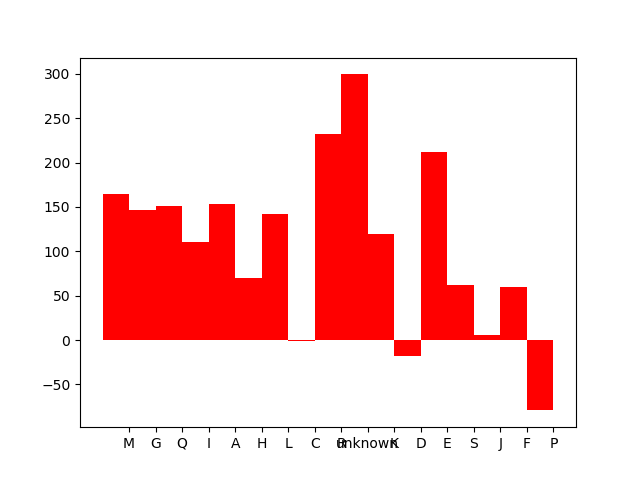

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_profit, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


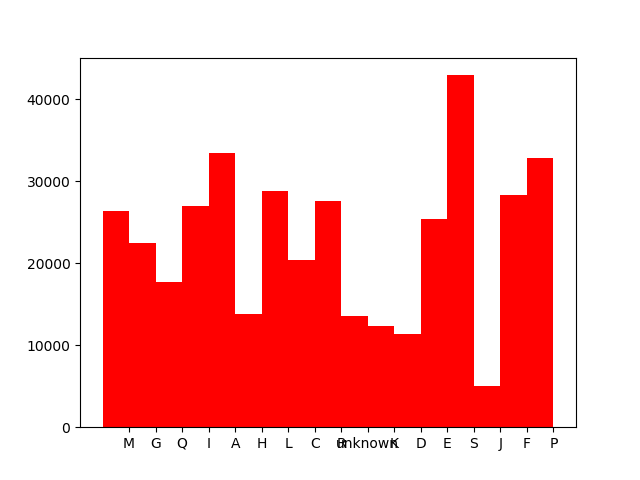

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_revenue, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


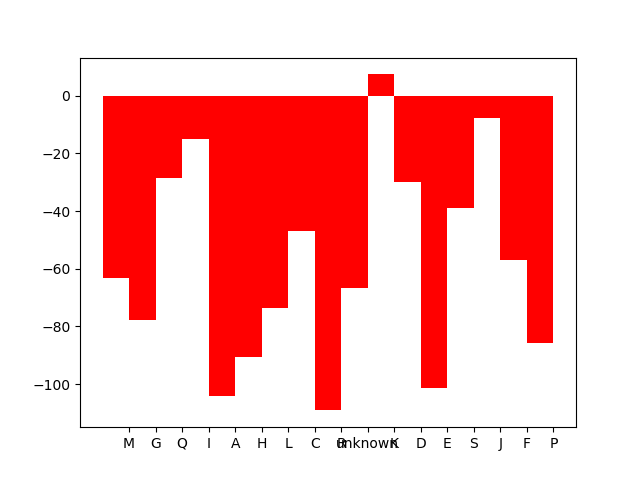

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, coeff, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


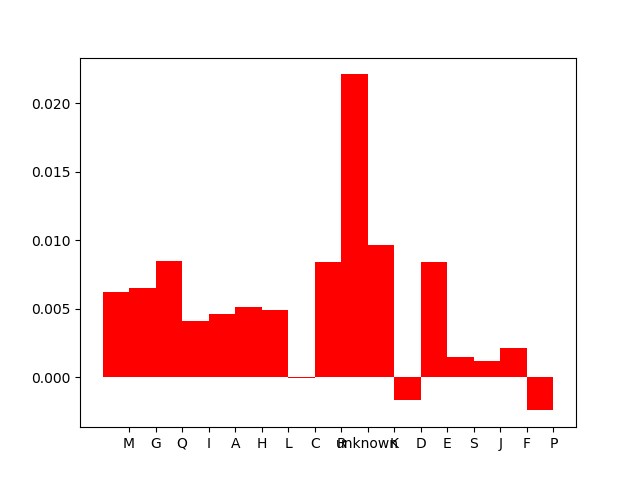

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, np.array(daily_profit)/np.array(daily_revenue), width, color='r')
plt.show()

<IPython.core.display.Javascript object>


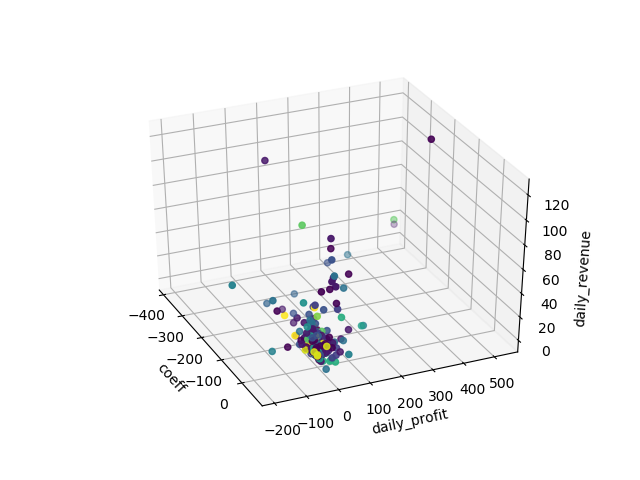

In [96]:
%matplotlib notebook
df1 = df.drop(["Labels"], axis=1)
sd = StandardScaler()
sd1 = RobustScaler()
df1 = sd.fit_transform(df1)
df1 = sd1.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['new_profit','new_income', 'coeff']
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df1["coeff"]
y = df1["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df1["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=pd.factorize( df['Labels'].to_numpy() )[0], marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('daily_profit')
ax.set_zlabel('daily_revenue')

plt.show()

The label is M


<IPython.core.display.Javascript object>


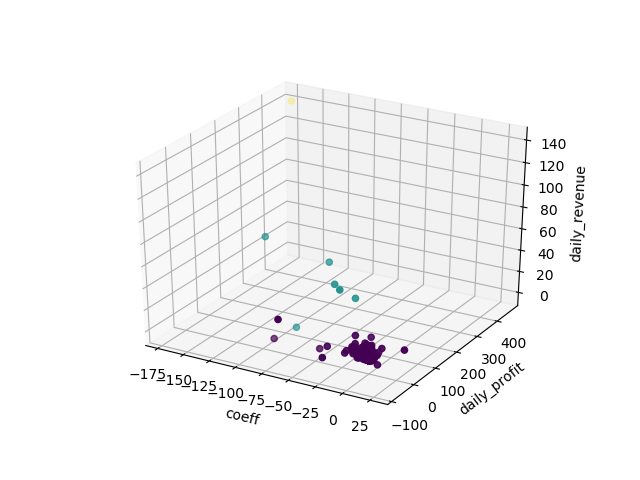

Counter({0: 502, 1: 6, 2: 1})
new_profit    0.869182
new_income    0.988635
coeff        -1.359339
0             0.000000
dtype: float64
new_profit    83.693569
new_income    44.555262
coeff        -63.403560
0              1.000000
dtype: float64
new_profit    465.267511
new_income    140.840415
coeff        -172.307898
0               2.000000
dtype: float64
The label is G


<IPython.core.display.Javascript object>


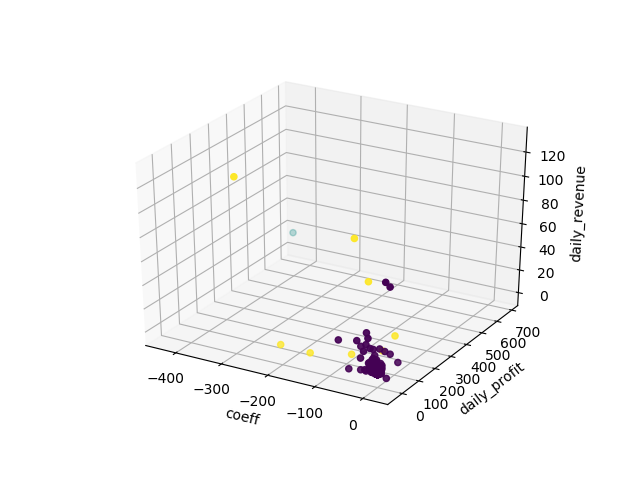

Counter({0: 749, 2: 8, 1: 1})
new_profit    1.479839
new_income    1.213271
coeff        -1.432215
0             0.000000
dtype: float64
new_profit    688.203356
new_income     16.372867
coeff        -433.999757
0               1.000000
dtype: float64
new_profit     85.167769
new_income     38.214300
coeff        -120.351063
0               2.000000
dtype: float64
The label is Q


<IPython.core.display.Javascript object>


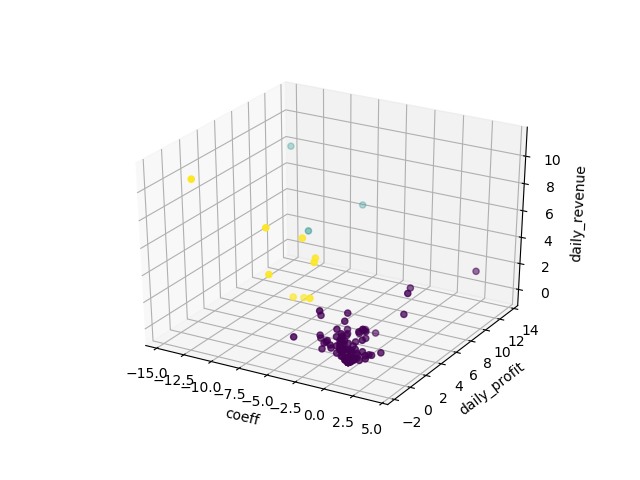

Counter({0: 139, 2: 9, 1: 3})
new_profit    0.541318
new_income    0.198156
coeff        -0.170750
0             0.000000
dtype: float64
new_profit    11.432144
new_income     5.673735
coeff        -10.528449
0              1.000000
dtype: float64
new_profit    0.525292
new_income    5.766442
coeff        -5.748857
0             2.000000
dtype: float64
The label is I


<IPython.core.display.Javascript object>


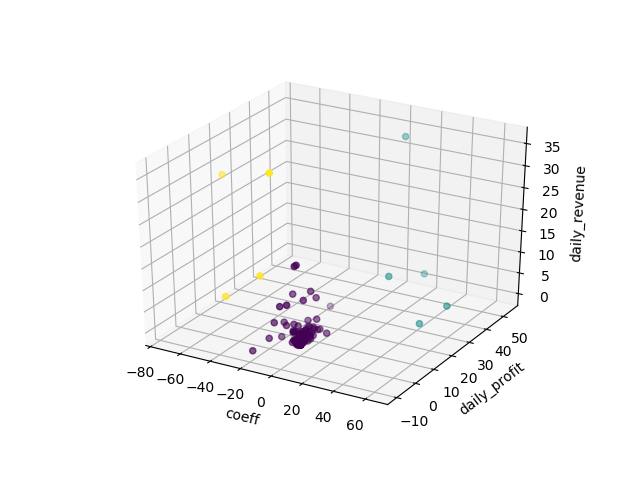

Counter({0: 210, 1: 5, 2: 4})
new_profit    0.897033
new_income    0.714568
coeff        -0.934724
0             0.000000
dtype: float64
new_profit    31.648419
new_income    12.389013
coeff         37.146337
0              1.000000
dtype: float64
new_profit     1.862484
new_income    22.685646
coeff        -37.705904
0              2.000000
dtype: float64
The label is A


<IPython.core.display.Javascript object>


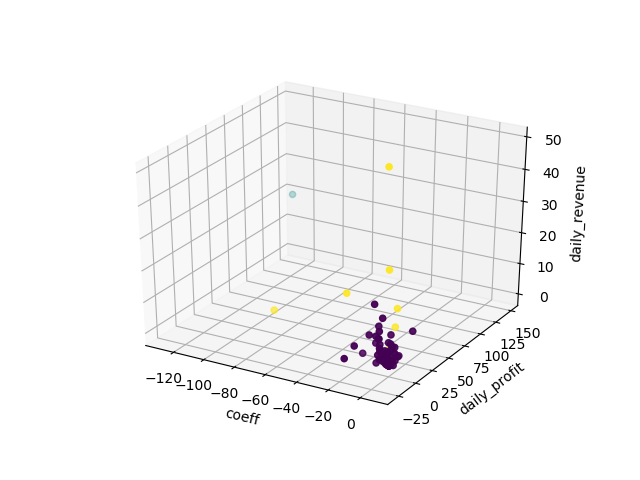

Counter({0: 232, 2: 7, 1: 1})
new_profit    0.585911
new_income    0.914872
coeff        -0.949983
0             0.000000
dtype: float64
new_profit    148.479909
new_income     19.291301
coeff        -128.743901
0               1.000000
dtype: float64
new_profit    29.119974
new_income    16.399333
coeff        -25.528363
0              2.000000
dtype: float64
The label is H


<IPython.core.display.Javascript object>


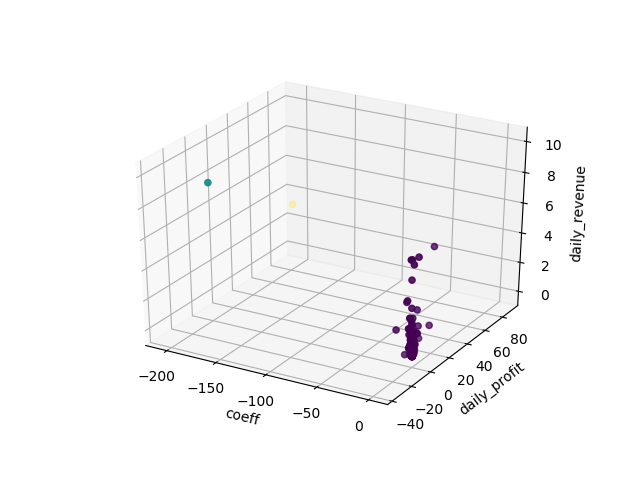

Counter({0: 159, 1: 1, 2: 1})
new_profit    0.805052
new_income    0.515980
coeff        -0.740691
0             0.000000
dtype: float64
new_profit    -35.356719
new_income     10.153687
coeff        -161.519256
0               1.000000
dtype: float64
new_profit     88.813823
new_income      3.174465
coeff        -206.606381
0               2.000000
dtype: float64
The label is L


<IPython.core.display.Javascript object>


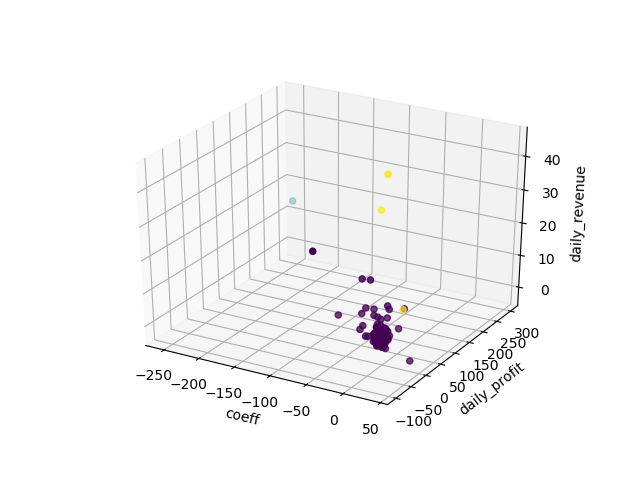

Counter({0: 323, 2: 3, 1: 1})
new_profit    0.639077
new_income    1.061702
coeff        -1.461697
0             0.000000
dtype: float64
new_profit    298.685948
new_income     14.260799
coeff        -255.035714
0               1.000000
dtype: float64
new_profit    96.824240
new_income    26.744186
coeff        -29.963804
0              2.000000
dtype: float64
The label is C


<IPython.core.display.Javascript object>


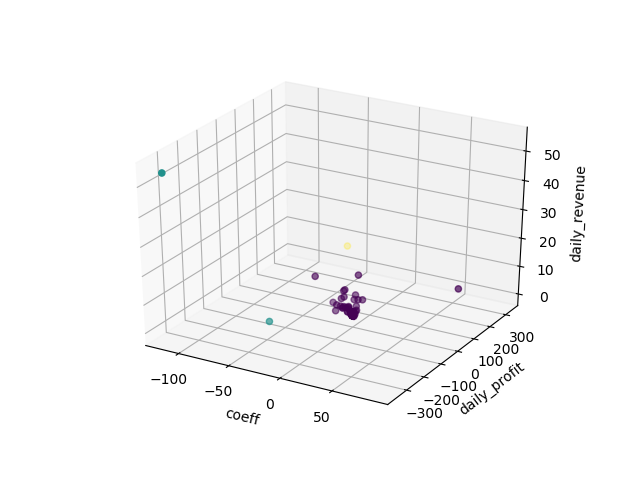

Counter({0: 150, 1: 2, 2: 1})
new_profit    1.549562
new_income    0.903861
coeff        -0.788276
0             0.000000
dtype: float64
new_profit   -284.382383
new_income     28.634440
coeff         -81.717149
0               1.000000
dtype: float64
new_profit    327.925255
new_income      6.618779
coeff         -61.705057
0               2.000000
dtype: float64
The label is R


<IPython.core.display.Javascript object>


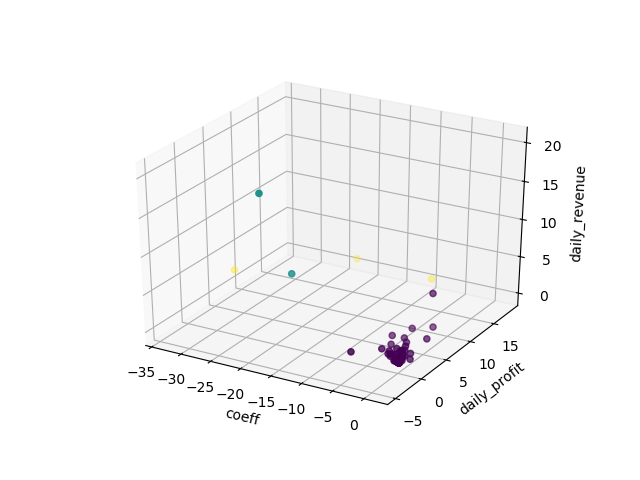

Counter({0: 65, 2: 3, 1: 2})
new_profit    0.741510
new_income    0.297111
coeff        -0.374299
0             0.000000
dtype: float64
new_profit    -3.825305
new_income    15.245726
coeff        -16.264290
0              1.000000
dtype: float64
new_profit    14.395530
new_income     1.485989
coeff        -21.469968
0              2.000000
dtype: float64
The label is unknown


<IPython.core.display.Javascript object>


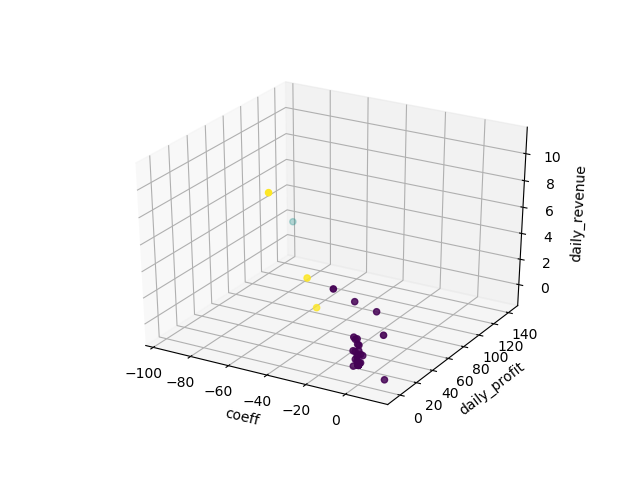

Counter({0: 55, 2: 3, 1: 1})
new_profit    1.067557
new_income    0.417502
coeff        -0.198703
0             0.000000
dtype: float64
new_profit    142.189270
new_income      1.714102
coeff         -96.096155
0               1.000000
dtype: float64
new_profit     9.199629
new_income     6.126311
coeff        -34.206790
0              2.000000
dtype: float64
The label is K


<IPython.core.display.Javascript object>


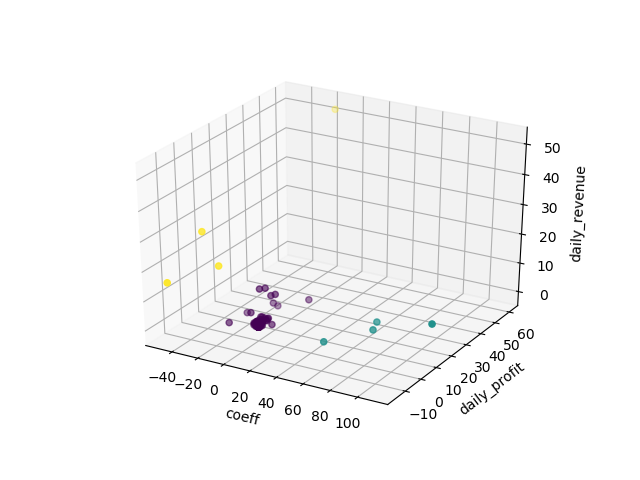

Counter({0: 136, 2: 4, 1: 4})
new_profit    0.890860
new_income    0.610849
coeff        -0.408384
0             0.000000
dtype: float64
new_profit    12.065876
new_income     2.270594
coeff         74.727059
0              1.000000
dtype: float64
new_profit    11.893145
new_income    27.991260
coeff        -34.730172
0              2.000000
dtype: float64
The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


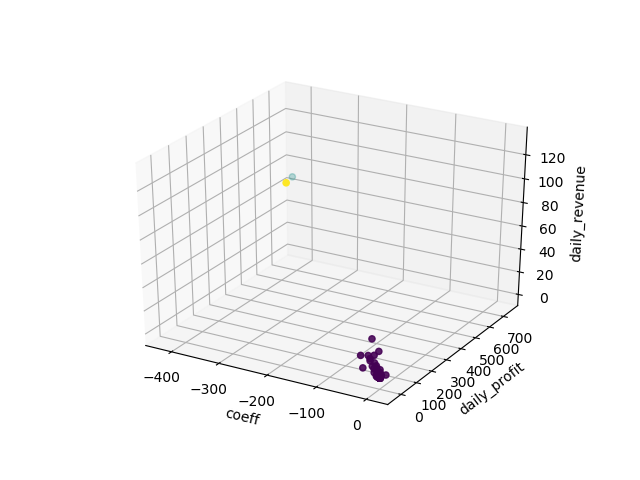

Counter({0: 161, 1: 1, 2: 1})
new_profit    0.893894
new_income    1.358368
coeff        -1.867677
0             0.000000
dtype: float64
new_profit    748.133963
new_income     67.792655
coeff        -423.439366
0               1.000000
dtype: float64
new_profit     89.834835
new_income    132.851010
coeff        -214.465401
0               2.000000
dtype: float64
The label is S


<IPython.core.display.Javascript object>


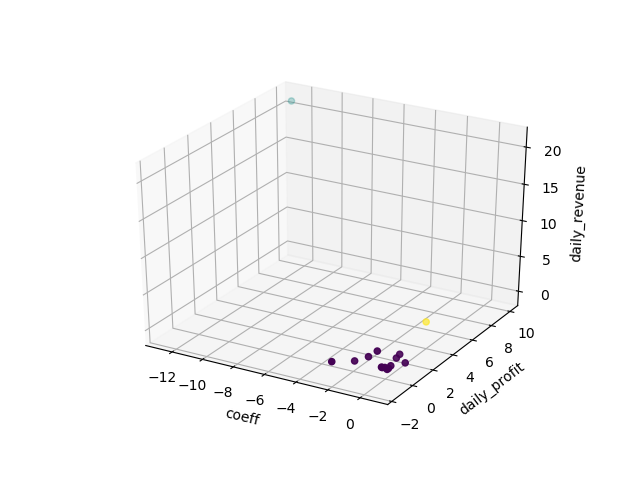

Counter({0: 13, 2: 1, 1: 1})
new_profit    0.027064
new_income    0.047131
coeff        -0.319940
0             0.000000
dtype: float64
new_profit    10.006179
new_income    21.064236
coeff        -12.768535
0              1.000000
dtype: float64
new_profit    4.099970
new_income    1.550810
coeff        -0.101392
0             2.000000
dtype: float64
The label is J


<IPython.core.display.Javascript object>


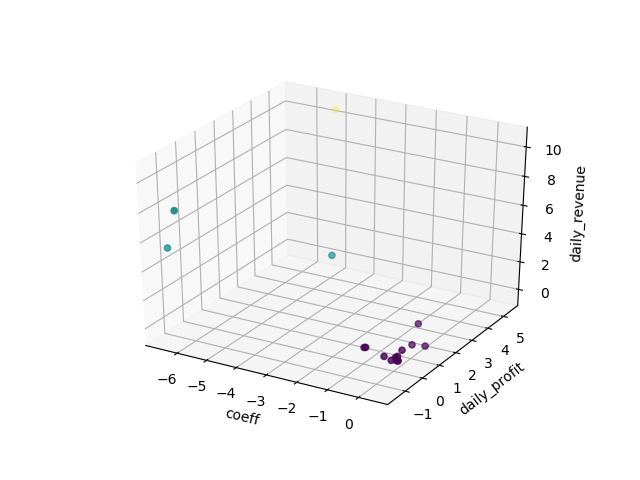

Counter({0: 13, 1: 3, 2: 1})
new_profit    0.216541
new_income   -0.018252
coeff        -0.053696
0             0.000000
dtype: float64
new_profit   -0.581694
new_income    6.086500
coeff        -5.159521
0             1.000000
dtype: float64
new_profit     5.428779
new_income    10.528328
coeff         -5.051006
0              2.000000
dtype: float64
The label is F


<IPython.core.display.Javascript object>


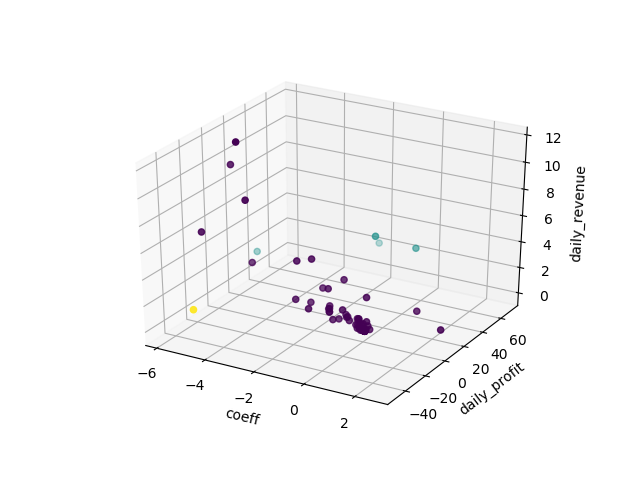

Counter({0: 86, 1: 4, 2: 1})
new_profit    0.364725
new_income    0.816055
coeff        -0.576565
0             0.000000
dtype: float64
new_profit    45.971903
new_income     3.224508
coeff         -2.137022
0              1.000000
dtype: float64
new_profit   -48.658008
new_income     2.022251
coeff         -4.800316
0              2.000000
dtype: float64
The label is P


<IPython.core.display.Javascript object>


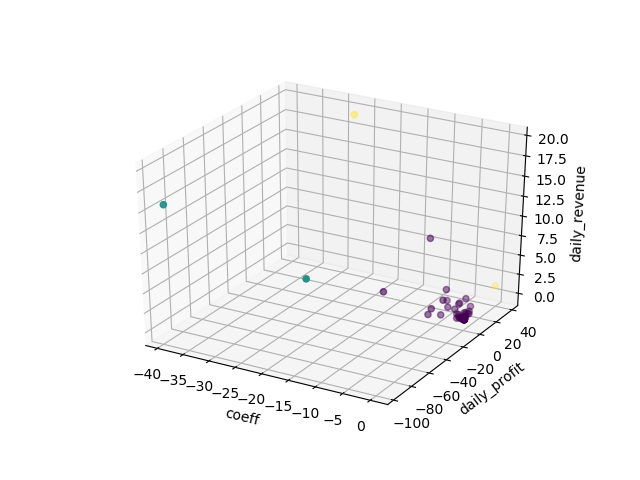

Counter({0: 61, 1: 2, 2: 2})
new_profit   -0.648155
new_income    0.511175
coeff        -0.763008
0             0.000000
dtype: float64
new_profit   -92.114677
new_income    12.676862
coeff        -27.104135
0              1.000000
dtype: float64
new_profit    36.281036
new_income    10.416593
coeff        -13.356825
0              2.000000
dtype: float64


In [95]:
%matplotlib notebook
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        kmeans_model = KMeans(n_clusters=3, random_state=1).fit(part)
        labels = kmeans_model.predict(part)
        k_means = labels
        fig = plt.figure()
        ax = fig.gca(projection='3d')               # to work in 3d


        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=labels, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')
        counter=collections.Counter(k_means)
        print(counter)
        part = pd.concat([part, pd.DataFrame(k_means)], axis=1, sort=False)
        print(part.loc[(part[0] == 0)].mean())
        print(part.loc[(part[0] == 1)].mean())
        print(part.loc[(part[0] == 2)].mean())
        plt.show()

The label is M


<IPython.core.display.Javascript object>


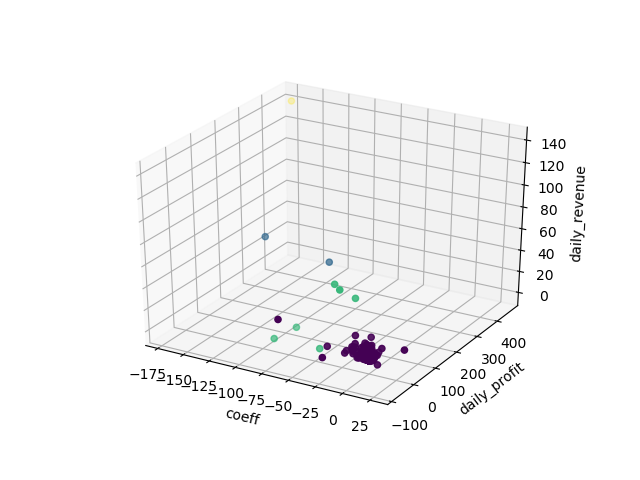

The label is G


<IPython.core.display.Javascript object>


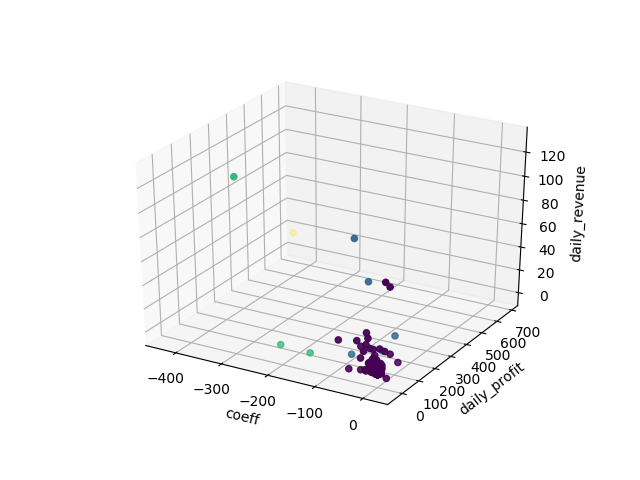

The label is Q


<IPython.core.display.Javascript object>


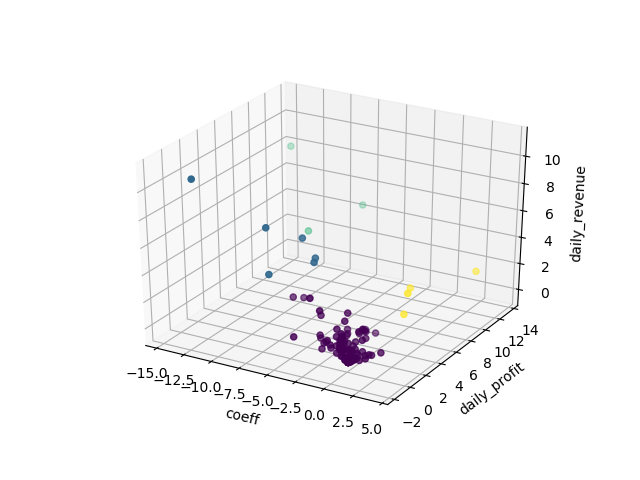

The label is I


<IPython.core.display.Javascript object>


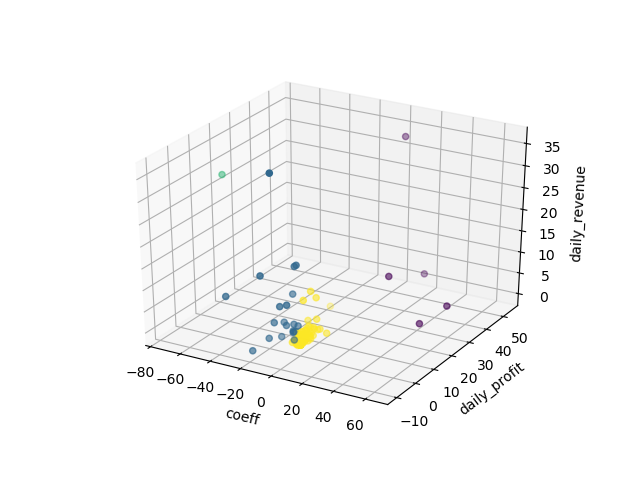

The label is A


<IPython.core.display.Javascript object>


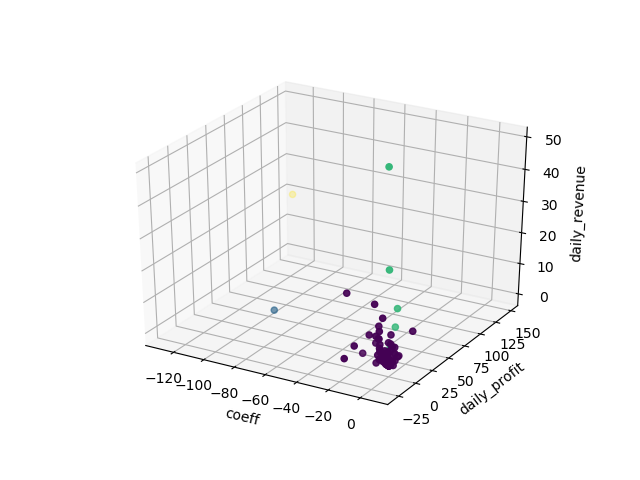

The label is H


<IPython.core.display.Javascript object>


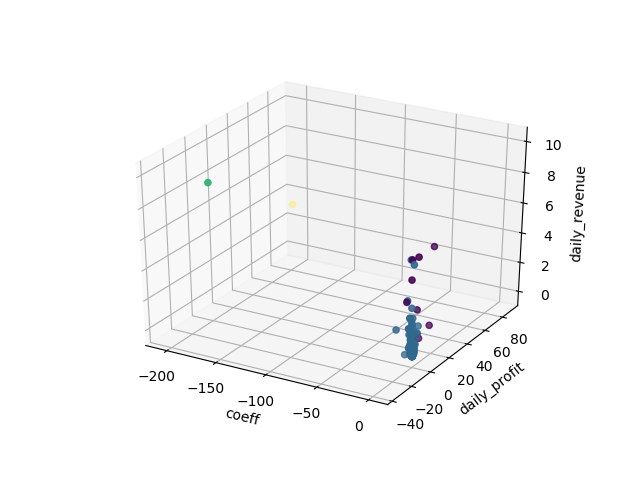

The label is L


<IPython.core.display.Javascript object>


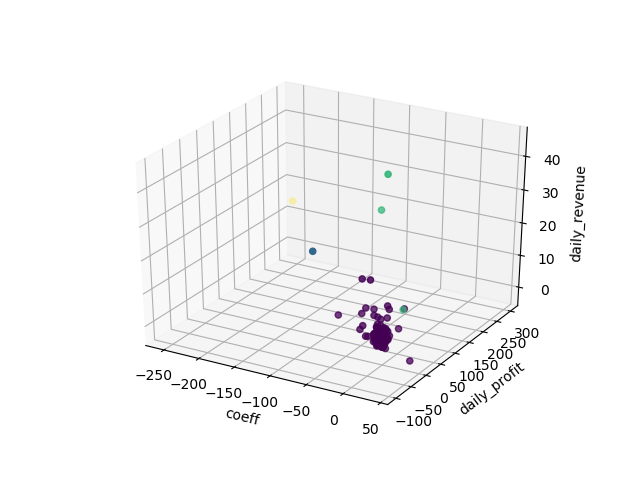

The label is C


<IPython.core.display.Javascript object>


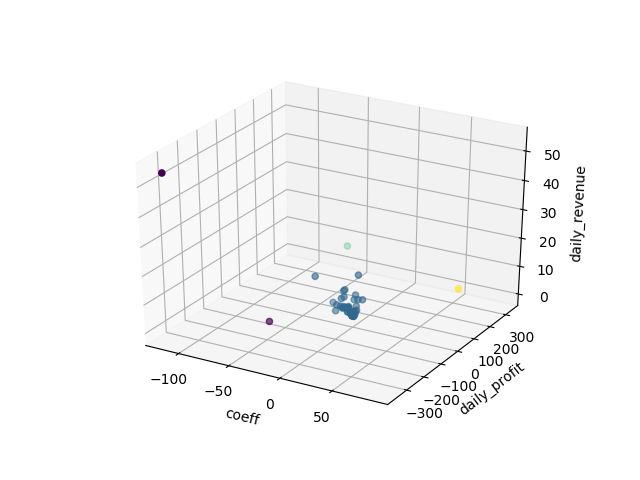

The label is R


<IPython.core.display.Javascript object>


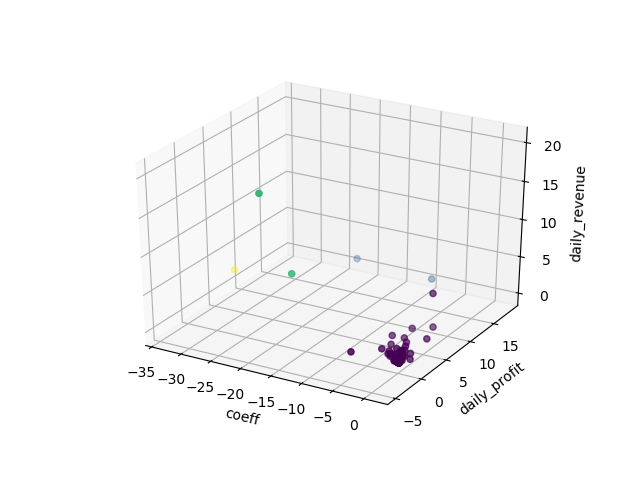

The label is unknown


<IPython.core.display.Javascript object>


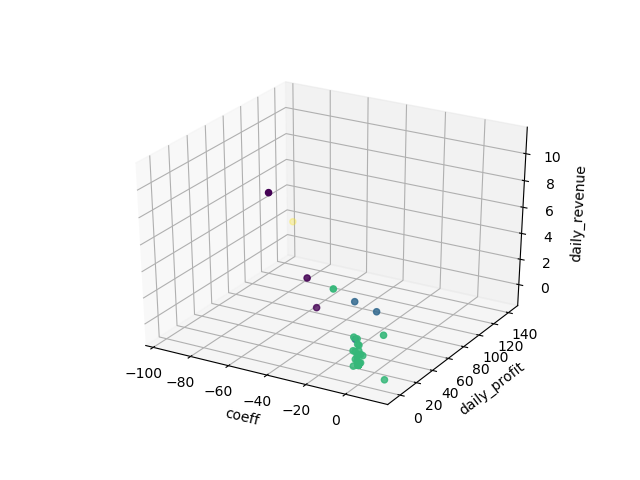

The label is K


<IPython.core.display.Javascript object>


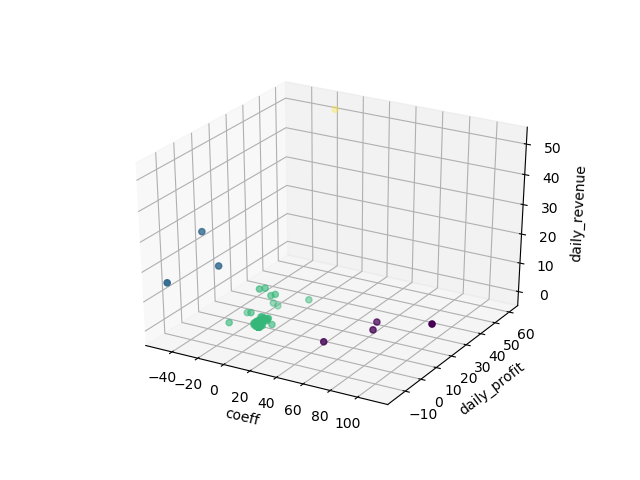

The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


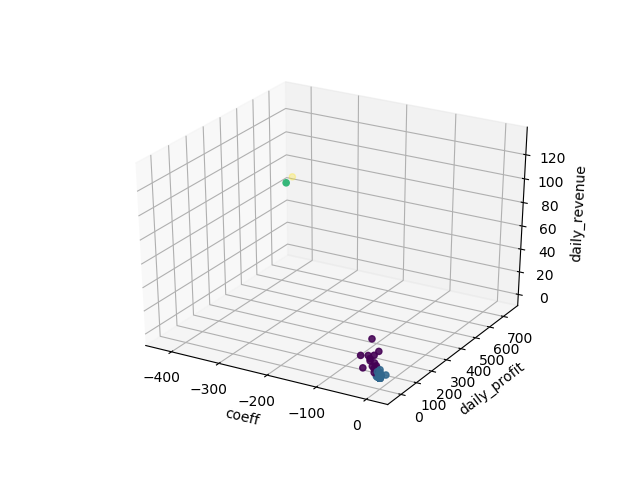

The label is S


<IPython.core.display.Javascript object>


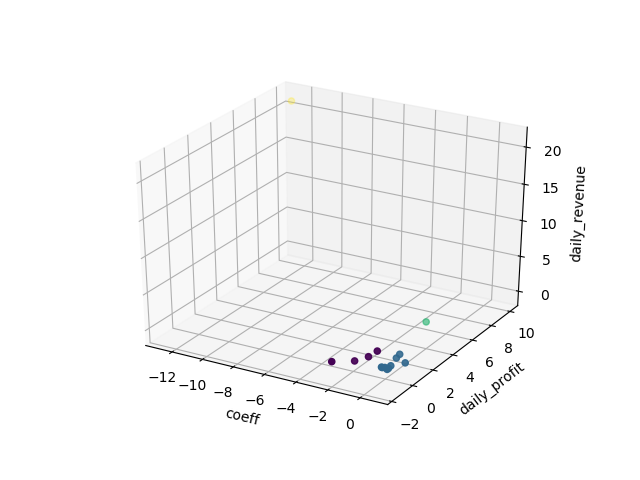

The label is J


<IPython.core.display.Javascript object>


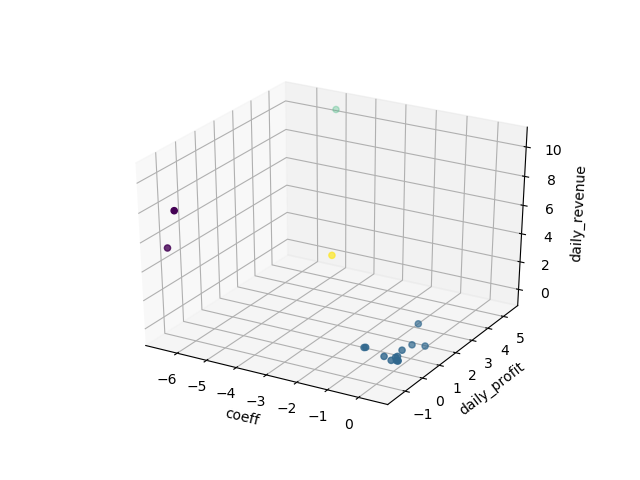

The label is F


<IPython.core.display.Javascript object>


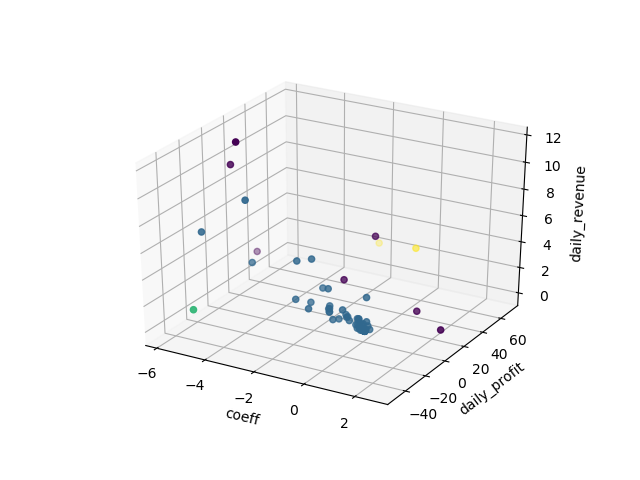

The label is P


<IPython.core.display.Javascript object>


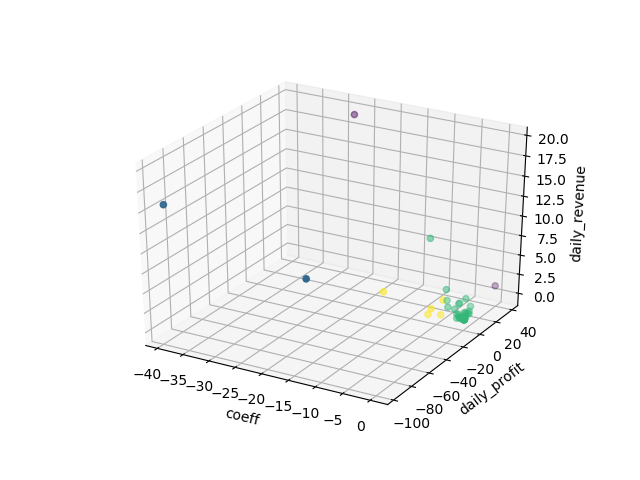

In [94]:
%matplotlib notebook
labels = df['Labels'].unique().tolist()
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        clusters2 = AgglomerativeClustering(n_clusters=4).fit_predict(part)
                     # to work in 3d

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=clusters2, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')

        plt.show()